In [1]:
import nltk  # NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

참고 링크 : https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221337575742
### 빠른 속도와 보통의 정확도를 원한다면 "Komoran" 또는 "Hannanum"
(이번 분석 중 Komoran의 놀라운 발전에 감짝 놀랐습니다.)
### 속도는 느리더라도 정확하고 상세한 품사 정보를 원한다면 "Kkma"
### 어느 정도의 띄어쓰기 되어 있는 "인터넷" 영화평/상품명을 처리할 땐 "Okt"
(만약 띄어쓰기가 없다면 느린 처리속도는 감수해야함)

## Kkma 모듈 

# 8-2. 한글 자연어 처리 기초

In [2]:
from konlpy.tag import Kkma #KoNLPy는 꼬꼬마, 한나눔 등의 엔진을 사용할 수 있게 해준다. 
kkma = Kkma()

In [3]:
# sentences 문장 분석 
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~ ')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
# nouns 명사 분석 
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~ ')

['한국어', '분석']

In [5]:
#pos 형태소 분석 
#part-of-speech
kkma.pos('한국어 분석을 시작합니다 재미있어요~~ ')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

## Hannanum 모듈 

In [6]:
from konlpy.tag import Hannanum 
hannanum=Hannanum()

In [7]:
# 명사분석 
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~ ')

['한국어', '분석', '시작']

In [8]:
#형태분석
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~ ')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

## Twitter 모듈 

In [9]:
from konlpy.tag import Twitter 
t=Twitter()

C:\Users\Berry\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~ ')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~ ')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~ ')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 8-3. 워드 클라우드
WordCloud 설치 : pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [14]:
text = open('C:/Users/Berry/Documents/Bigdata_study/09. alice2.txt').read()
alice_mask = np.array(Image.open('C:/Users/Berry/Documents/Bigdata_study/09. alice_mask.png'))

stopwords = set(STOPWORDS) #said 단어가 많이 나와서 카운트에서 제거 
stopwords.add("said")

In [18]:
#폰트설정 
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    


In [21]:
%matplotlib inline
.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') #cmap : str or Colormap, optional
plt.imshow(wc, interpolation='bilinear') 
#bilinear형태 확인 
#https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
plt.axis('off')
plt.show()
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-37454a55f441>, line 2)

In [ ]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords) #max_words  단어 최대 갯수 
wc = wc.generate(text)
wc.words_ #최빈단어 
#가장 많이 나온 단어 Alice 기준으로 나열 

In [ ]:
# 기존 엘리스 이미지 위에 글씨를 나타냄 
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#스타워즈 & A New Hope 
text = open('09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('09. stormtrooper_mask.png'))

In [ ]:
# 특수하게 처리해야 할 단어 처리
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [ ]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()import random

In [ ]:
# 색상을 전체적으로 grey 회색으로 채우는 함수 
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

# 8-4 육아휴직 관련 법안에 대한 분석 

In [32]:
import nltk

In [33]:
from konlpy.corpus import kobill #konlpy에 내장되어있는 법률문서 
file_ko=kobill.fileids()
doc_ko=kobill.open('1809890.txt').read()

In [34]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [35]:
#Twitter 분석기로 명사 분석 

from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko) #명사
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [36]:
# 수집된 단어의 횟수(len(ko.tokens))와 고유한 횟수(len(set(ko.tokens))) 확인 
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [37]:
print(len(ko.tokens))        
print(len(set(ko.tokens)))  
ko.vocab()                        # 빈도수 분포도 

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [1]:
print(ko.vocab())

NameError: name 'ko' is not defined

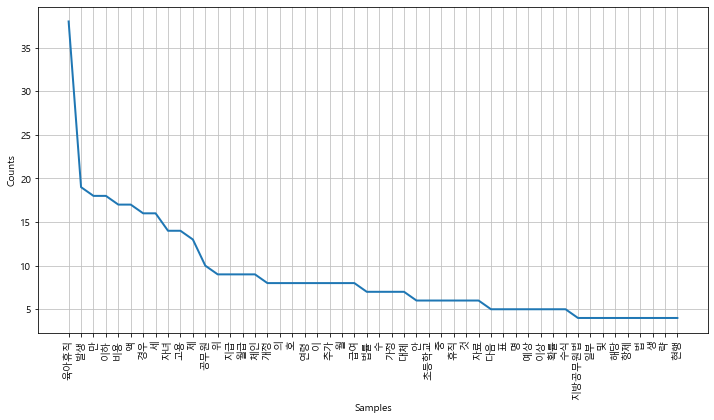

In [38]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [39]:
# 한글은 영어와 달리 stopwords를 지정하기 어려움 -> case-by-case 로 지정 
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

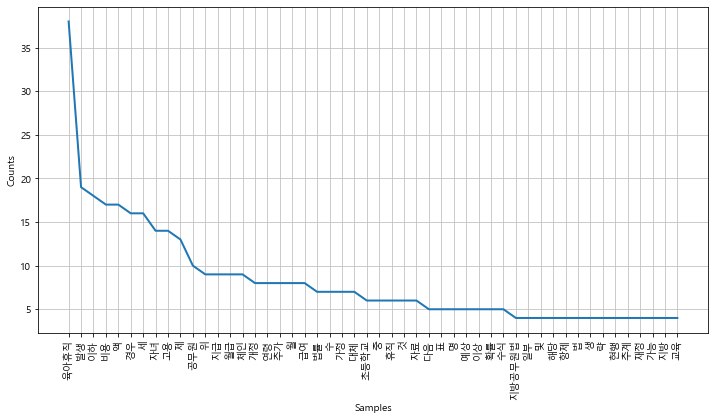

In [40]:
# 다시 그려보면
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [41]:
# 의미없었던 단어들이 제거된걸 볼 수 있음 

In [42]:
ko.count('초등학교')

6

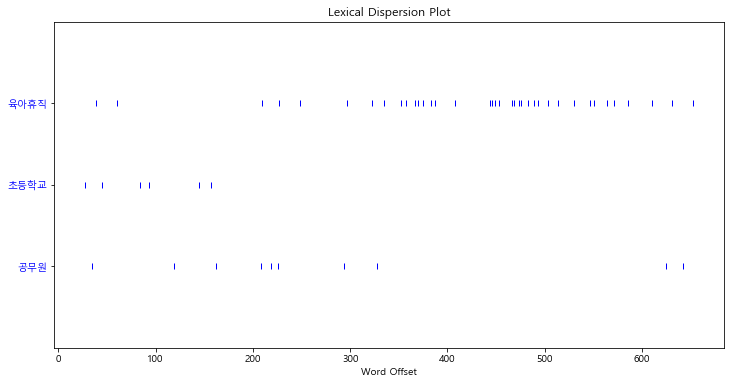

In [43]:
# 어떤 단어가 문서 내에서 몇 번 언급되었는지 확인할 수 있음 
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원']) #어휘 분산 

In [44]:
# 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다. 
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [45]:
# 어떤 단어들이 나란히 놓였는지 알 수 있다. 
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


In [46]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(from nltk.tokenize import word_tokenize
import nltk)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-d91c517e9ce0>, line 6)

# 8-5. Naive Bayes Classifier의 이해 - 영문

In [47]:
from nltk.tokenize import word_tokenize
import nltk

In [48]:
# pos 긍정 neg 부정을 직접 태그
# i like you 는 긍정이지만 
# you like me 는 부정 

#즉, like로 판단하는게 아니라 i인지 you인지로 판단한다. 
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [49]:
# train 문장에서 사용된 전체 단어를 찾는다
all_words = set(word.lower() for sentence in train #word.lower : word들을 소문자로 바꾼다  #train 중 문장들 
                                                            for word in word_tokenize(sentence[0])) #문장들 중 0번째 단어 
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [50]:
#train 문장에 속한 단어인지 아닌지 보여줌 
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'i': True,
   'you': True,
   'me': False,
   'like': True,
   'hate': False,
   'her': False},
  'pos'),
 ({'i': True,
   'you': True,
   'me': False,
   'like': False,
   'hate': True,
   'her': False},
  'neg'),
 ({'i': False,
   'you': True,
   'me': True,
   'like': True,
   'hate': False,
   'her': False},
  'neg'),
 ({'i': True,
   'you': False,
   'me': False,
   'like': True,
   'hate': False,
   'her': True},
  'pos')]

In [51]:
# Naive Bayes 분류기 
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

#hate 라는 단어가 없을때(False) 긍정일 비율이 1.7:1 이라는 의미 
# like 단어가 총 세번 사용되었고, 그중 2개 문장이 긍정 
# 따라서 긍정(true)일 확률이 1.7:1 이다 

Most Informative Features
                    like = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


In [52]:
#위에서 만든 분류기에 새로운 문장 통과시켜봄 
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'i': True,
 'you': False,
 'me': False,
 'like': True,
 'hate': False,
 'her': False}

In [53]:
# pos 긍정적이다는 결과가 나옴 
classifier.classify(test_sent_features)

'pos'

# 8-6. Naive Bayes Classifier의 이해 - 한글
## 한글은 영어랑 다르게 형태소 분석을 해야한다. 

In [54]:
from konlpy.tag import Twitter

In [55]:
pos_tagger = Twitter()

In [56]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [57]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [58]:
# 고양이도, 고양이야   메리가,메리는 다른 단어로 잡힘  

In [59]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'메리가': True,
   '고양이도': False,
   '마치고': False,
   '난': False,
   '고양이야': False,
   '메리랑': False,
   '놀거야': False,
   '메리는': False,
   '지루해': False,
   '이쁜': False,
   '좋아': True,
   '수업이': False},
  'pos'),
 ({'메리가': False,
   '고양이도': True,
   '마치고': False,
   '난': False,
   '고양이야': False,
   '메리랑': False,
   '놀거야': False,
   '메리는': False,
   '지루해': False,
   '이쁜': False,
   '좋아': True,
   '수업이': False},
  'pos'),
 ({'메리가': False,
   '고양이도': False,
   '마치고': False,
   '난': True,
   '고양이야': False,
   '메리랑': False,
   '놀거야': False,
   '메리는': False,
   '지루해': True,
   '이쁜': False,
   '좋아': False,
   '수업이': True},
  'neg'),
 ({'메리가': False,
   '고양이도': False,
   '마치고': False,
   '난': False,
   '고양이야': True,
   '메리랑': False,
   '놀거야': False,
   '메리는': True,
   '지루해': False,
   '이쁜': True,
   '좋아': False,
   '수업이': False},
  'pos'),
 ({'메리가': False,
   '고양이도': False,
   '마치고': True,
   '난': True,
   '고양이야': False,
   '메리랑': True,
   '놀거야': True,
   '메리는': False,
   '지루해': False,
   '이쁜': 

In [60]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0


In [61]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [62]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'메리가': False,
 '고양이도': False,
 '마치고': False,
 '난': True,
 '고양이야': False,
 '메리랑': True,
 '놀거야': True,
 '메리는': False,
 '지루해': False,
 '이쁜': False,
 '좋아': False,
 '수업이': True}

In [63]:
classifier.classify(test_sent_features)

'neg'

In [64]:
#긍정적인 결과가 나와야하는데 부정적으로 나옴 -> 형태소 분석 안해서 

In [65]:
#형태소 분석을 해준다 ! 

def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)] # /랑 t를 joint 함 -> 태그를 붙여주는 것이 유리함 

In [66]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [67]:
# 전체 말뭉치 
tokens = [t for d in train_docs for t in d[0]] #train_docs 의 d원소 , d[0] 들 / 즉 단어들만 (긍정/부정 빼고)
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [68]:
#말뭉치에 있는지 아닌지 구분하는 함수 
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [69]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [70]:
#분류기 동작
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [71]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [72]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [73]:
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [74]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [75]:
classifier.classify(test_sent_features)

'pos'

In [76]:
# 긍정으로 잘 나온걸 확인할 수 있다. 

# 8-7. 문장의 유사도 측정

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# CountVectorize : Convert a collection of text documents to a matrix of token counts  
vectorizer = CountVectorizer(min_df = 1)

In [17]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [18]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names() #띄어쓰기 단위로 잘림 

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [19]:
X.toarray().transpose()
# 열로 읽는것임 
# 첫번째 열은 '메리랑 놀러가고 싶지만 바쁜데 어떡하죠?'이고 각자의 토큰들이 위에 vectorizer에 순서대로 들어감 
# ex ) '메리랑' 은  11번째 토큰이므로 11번째 행에 1이 들어가있음 
# '놀러가고'는 8번째 토큰이라 8번째 행에 1 들어감 

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [20]:
#한글 문장에 더 최적화하기 위해 트위터 사용 
from konlpy.tag import Twitter
t = Twitter()

C:\Users\LENOVO\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [21]:
contents_tokens = [t.morphs(row) for row in contents] #형태소로 끊음 
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떡하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [22]:
contents_for_vectorize=[] 

for content in contents_tokens:
    sentence=''
    for word in content:
        sentence=sentence+' '+word #토큰끼리 띄어쓰기로 구분해서 문장 다시 완성 
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize     
        
    

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떡하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [23]:
#feature를 찾는다
X=vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features=X.shape
num_samples, num_features

(4, 20)

In [24]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [25]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [26]:
# 새로운 문장이 있으면 그 문장을 동일한 과정으로 벡터화해서 각 벡터들 사이의 거리를 구한다. 
new_post=['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens=[t.morphs(row) for row in new_post]

new_post_for_vectorize=[]

for content in new_post_tokens:
    sentence=''
    for word in content:
        sentence=sentence+' '+word #토큰끼리 띄어쓰기로 구분해서 문장 다시 완성 
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize     

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [27]:
# 벡터화 과정 
new_post_vec=vectorizer.transform(new_post_for_vectorize)

In [28]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [29]:

import scipy as sp

def dist_raw(v1,v2):
    delta=v1-v2
    return sp.linalg.norm(delta.toarray()) #sp.linalg.norm : This function is able to return one of seven different matrix norms, or one of an infinite number of vector norms (described below), depending on the value of the ord parameter.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html 
# 유클리드 거리 - array형태로 넣었을때 계산 가능 
# sqrt{시그마(d2-d1)^2}

In [30]:
#각 문장과 새로운 문장의 거리를 구함 
best_doc = None
best_dist = 65535 #이걸 정한 기준은 ?,,,
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i) #getrow : Returns a copy of row i of the matrix as a (1 x n) DOK matrix. 
    d = dist_raw(post_vec, new_post_vec) # 기존의 한 열과 새로운 열의 거리를 비교 
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist: #가장 가까운 거리를 best_dist로 정의 
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [31]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post) #새로운 문장 
print('---->', contents[best_i]) #가장 가까운 문장 

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [32]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [33]:
# 거리를 다르게 구해보면 
## sp.linalg.norm:sqrt{시그마(ai)^2}
# 무슨 방법인지 모르겠음 ,,,  
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [34]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [35]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


# tfidf 란 ? 단어별로 부과하는 가중치 
## tf(term frequency) : 어떤 단어가 문서 내에서 자주 등장할수록 중요도가 높다 
## idf(inverse document frequency) : 비교하는 모든 문서에 만약 같은 단어가 있다면 이 핵심 어휘일지 모르지만 문서 간이 비교에서는 중요한 단어가 아니다 

In [23]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d)) #d문서 중 t의 갯수 
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) ) # log(전체문서의 수 / token이 포함된 문서의 수) #log(1/P(t|D)) = log(N/|{t가 d에속할때, d가 D에속함}|)
    return tf, idf

In [11]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]
len([doc for doc in D if 'b' in doc])  #각 document 내에서 b가 몇군데 속하는지 

2

In [24]:

a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [25]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

# tfdif 값이 높다면 다른 문서에 잘 언급되지 않은 단어 
# 낮다면 다른 문서에 잘 언급되는 단어이다 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [27]:
contents_tokens = [t.morphs(row) for row in contents] #형태소 -> 토큰 

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word #형태소별로 띄어쓰기 
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [28]:
# 위에서 만든 말뭉치 확인 
vectorizer.get_feature_names() 

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [29]:
#새로운 문장도 위와 같은 과정으로 
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [30]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [31]:
#새 문장과 기존 문장의 거리 비교 
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?


# 8-8. 여자 친구 선물 고르기

In [37]:

import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [38]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [39]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여친 선물 추천해주세여 오프라인에서   2020.01.22.   여친 선물 추천해주세여 오프라인에서 살수잇는거요   답변 https://smartstore.naver.com/daon_flower/products/4791744595 사진하바리움, 꽃무드등, 커플하바리움, 여친선물, 기념일, 졸업선물, 프리저브드 : DAON FLOWER [DAON FLOWER] 꽃과...    닉네임dlsr****   ',
 '  질문  아빠가 어제 카드 주셔서 여친 선물   2020.02.04.   아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면...   답변 제가 보기에는 여친이 너무 무리하게 요구하는것 같은데 무리해서도라도 사주고 싶은 건가요? 남친을 곤란하게 만드는 여친이라면 고민해 보셔야할듯 해요~사랑은 둘이...    닉네임후니맘   ',
 '  질문  여우님!! 정품문의 답변즘여 여친선물인데....   2020.01.29.   셀렉온에서 구매했으며 EATTREND에서 물품 배송되었어요. 메종 마르지엘라 5AC 미니백 부탁드립니다. 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다.   답변 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요;    닉네임은빛여우   ',
 '  질문  다이어트하는 여친선물로 가장 특별한것은?   2019.11.14.   다이어트하는 여친선물로 가장 특별한것은? 1.밀크프로틴wph그리2.리치밀데이3.wpa단백질4.스마트프로틴50 5.녹차 6.커피   답변 

In [40]:
#위의 문장들을 저장함 
# time sleep 때문에 시간이 오래 걸림 
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [41]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여자친구 선물 추천 좀 해주세요!   2020.04.13.   1주년이 되어서 여자친구 선물을 구매하려고 하는데요. 어떤걸로 여자친구 선물 주면은 좋을까요? 특별한걸로 여자친구 선물 추천 해주세요!   답변 여자친구 선물을 하시려나 봅니다. 어떠한 여자친구 선물로 좋은 날 기념 하실지는 모르지만 여자친구 분의 취향에 알맞거나 평소에 갖고 싶어하던 걸로 여자친구 선물을...    닉네임chwu****   ',
 "  질문  여자친구 선물   6일 전   여자친구 선물 로즈데이에 장미 외에 선물할 수 있는 게 있을까요? 아직 연애 초라서 여러가지 기념일을 많이 챙겨주고 싶네요.   답변 저는 조금 특별한 선물을 추천해드립니다. 아마 처음보시는 상품일거에요! 남들처럼 흔하지 않고 소중하고 기억에 남을 수 있는 '향기나는 사진 하바리움 무드등...     닉네임gnsr****   ",
 '  질문  여자친구 선물 추천 부탁드려요~   2020.01.20.   저기요...여자친구 선물 추천 좀 해 주세요~ 너무 부담스럽지 않은 가벼운 종류로 찾고... 없이 좋아하면서도 실용적인 그런 종류로 괜찮은 여자친구 선물 추천 부탁드립니다~   답변 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨... 같아서 여자친구 선물 추천으로 딱인 것 같아요~~ 저도... 역시 여자친구 선물 추천이라고 하면 꽃!! 하지만 진짜...    닉네임hm8h****   ',
 '  질문  여자친구 선물로 감동적인게 뭐가 있을까요?   2020.04.07.   나중에 헤어진다고 해도 평생 저를 잊을 수 없는 선물을 해주고 싶어요 선물이라는게 정성이지만 직접 만들고 꾸미는 건 재주가 없어서 못하고요 

In [42]:
len(present_candi_text)

1300

In [43]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\Users\LENOVO\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [44]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n' #위의 저장된 리스트 형태의 문장들을 하나로 묶어냄 

In [46]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '여자친구',
 '선물',
 '추천',
 '좀',
 '해주세요',
 '!',
 '2020.04',
 '.',
 '13',
 '.',
 '1',
 '주년',
 '이',
 '되어서',
 '여자친구',
 '선물',
 '을',
 '구매',
 '하려고',
 '하는데요',
 '.',
 '어떤',
 '걸',
 '로',
 '여자친구',
 '선물',
 '주면은',
 '좋을까요',
 '?',
 '특별한',
 '걸',
 '로',
 '여자친구',
 '선물',
 '추천',
 '해주세요',
 '!',
 '답변',
 '여자친구',
 '선물',
 '을',
 '하시려나',
 '봅니다',
 '.',
 '어떠한',
 '여자친구',
 '선물',
 '로',
 '좋은',
 '날',
 '기념',
 '하실지는',
 '모르지만',
 '여자친구',
 '분',
 '의',
 '취향',
 '에',
 '알맞거나',
 '평소',
 '에',
 '갖고',
 '싶어하던',
 '걸',
 '로',
 '여자친구',
 '선물',
 '을',
 '...',
 '닉네임',
 'chwu',
 '****',
 '질문',
 '여자친구',
 '선물',
 '6일',
 '전',
 '여자친구',


In [47]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens)) # 토큰으로 모은 단어 갯수 
print(len(set(ko.tokens))) #총 토큰은 92000개지만 중복된 단어를 제거하면 406개이다 

92000
406


In [48]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100) #가장 많이 나온 단어 100개 

#의미 없는 단어들 제거할 필요 있음  -> 보통 한자리 단어들은 제거함 

[('선물', 6400),
 ('여자친구', 6000),
 ('.', 3300),
 ('...', 2700),
 ('로', 2300),
 ('가', 1500),
 ('추천', 1400),
 ('대', 1400),
 ('을', 1200),
 ('질문', 1100),
 ('답변', 1000),
 ('닉네임', 1000),
 ('****', 1000),
 ('거', 1000),
 ('?', 900),
 ('에', 900),
 ('20', 800),
 ('뭐', 700),
 ('는', 600),
 ('!', 600),
 ('이', 600),
 ('걸', 600),
 ('좋은', 600),
 ('저', 600),
 ('10', 600),
 ('단어', 500),
 ('의', 500),
 ('좀', 500),
 ('생일', 500),
 ('검색', 400),
 ('를', 400),
 ('해주세요', 400),
 ('좋을까요', 400),
 ('수', 400),
 ('게', 400),
 ('~', 400),
 ('요', 400),
 ('너무', 400),
 ('괜찮은', 400),
 ('같아요', 400),
 ('싶어요', 400),
 ('여자', 400),
 ('이런', 400),
 ('화장품', 400),
 ('입력', 300),
 ('하는', 300),
 ('할', 300),
 ('때', 300),
 ('평소', 300),
 ('있을까요', 300),
 ('적', 300),
 ('으로', 300),
 ('스킨', 300),
 ('것', 300),
 ('감동', 300),
 ('없는', 300),
 ('해주고', 300),
 ('고민', 300),
 ('2019.05', 300),
 ('화이트데이', 300),
 ('한', 200),
 ('포함', 200),
 ('된', 200),
 ('합니다', 200),
 ('여러', 200),
 ('2020.04', 200),
 ('1', 200),
 ('하는데요', 200),
 ('어떤', 200),
 ('특별한', 200),


In [50]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6400),
 ('여자친구', 6000),
 ('추천', 1400),
 ('닉네임', 1000),
 ('****', 1000),
 ('!', 600),
 ('걸', 600),
 ('좋은', 600),
 ('저', 600),
 ('생일', 500),
 ('검색', 400),
 ('해주세요', 400),
 ('좋을까요', 400),
 ('너무', 400),
 ('괜찮은', 400),
 ('같아요', 400),
 ('싶어요', 400),
 ('여자', 400),
 ('이런', 400),
 ('화장품', 400),
 ('입력', 300),
 ('평소', 300),
 ('있을까요', 300),
 ('적', 300),
 ('스킨', 300),
 ('감동', 300),
 ('없는', 300),
 ('해주고', 300),
 ('고민', 300),
 ('2019.05', 300),
 ('화이트데이', 300),
 ('포함', 200),
 ('된', 200),
 ('합니다', 200),
 ('여러', 200),
 ('2020.04', 200),
 ('하는데요', 200),
 ('특별한', 200),
 ('분', 200),
 ('기념일', 200),
 ('많이', 200),
 ('남', 200),
 ('부탁드려요', 200),
 ('2020.01', 200),
 ('해', 200),
 ('주세요', 200),
 ('종류', 200),
 ('찾고', 200),
 ('잊을', 200),
 ('직접', 200)]

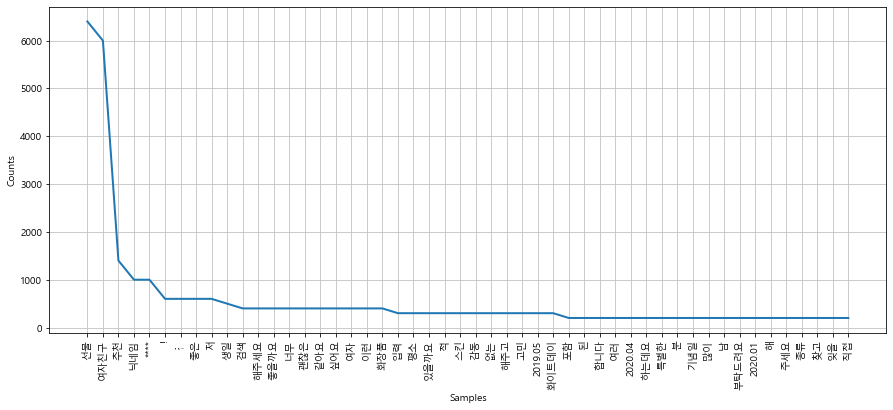

In [51]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [52]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

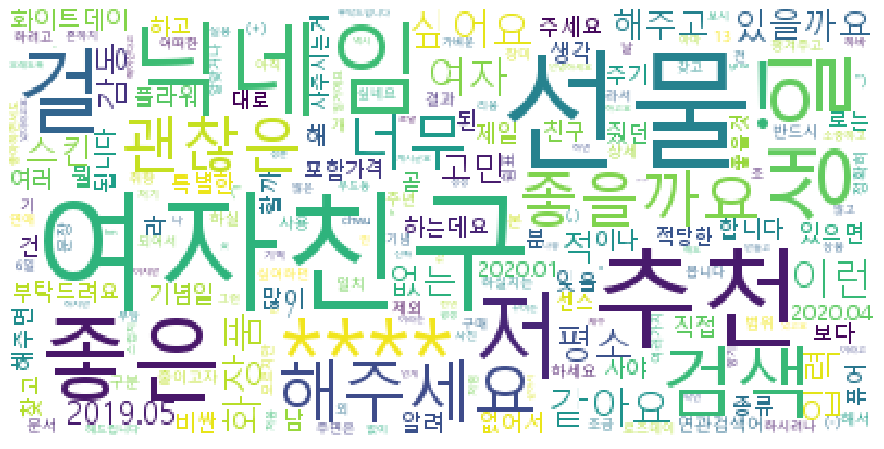

In [53]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [54]:

mask = np.array(Image.open('09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [55]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

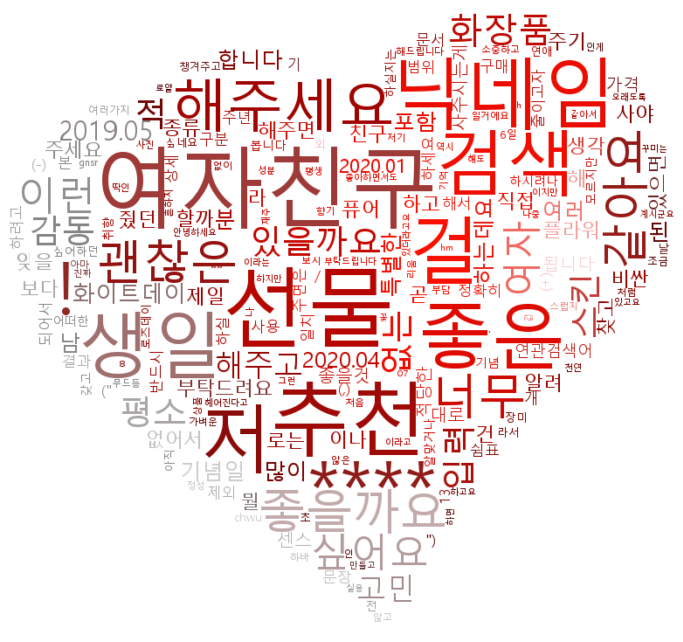

In [56]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
!pip install gensim

# 자연어 처리에서 word2vec을 지원하는 gensism을 사용함 

In [58]:

import gensim
from gensim.models import word2vec

In [59]:

twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True) #형태소만 
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]: #조사나 어미들은 제거함 #word[1]에 pos에서 어떤형태인지 나타남 
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 추천 좀 해주다 2020.04 13 1 주년 되어다 여자친구 선물 구매 하다 하다 어떤 것 여자친구 선물 주다 좋다 특별하다 여자친구 선물 추천 해주다 답변 여자친구 선물 하다 보다 어떠하다 여자친구 선물 좋다 날 기념 하다 모르다 여자친구 분 취향 알맞다 평소 갖다 싶다 것 여자친구 선물 닉네임 chwu
질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 상품 이다 남 들 흔하다 않다 소중하다 기억 남 수 있다 향기 나 사진 하바 리움 무드등 닉네임 gnsr
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변

질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 상품 이다 남 들 흔하다 않다 소중하다 기억 남 수 있다 향기 나 사진 하바 리움 무드등 닉네임 gnsr
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여

질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여자친구 선물 제일 좋다 것 같다 닉네임 5 p 9 f
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선

질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여자친구 선물 제일 좋다 것 같다 닉네임 5 p 9 f
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 화이트데이 여자친구 선물 적당하다 가격 센스 있다 2020.03 11 센스 없다 편이 여자친구 마음 들다 않다 웬만하다 선물 다한 거 같다 화이트데이 여자친구 선물 적당하다 가격 괜찮다 거 추천 좀 해주다 답변 화이트데이 여자친구 선물 평소 남자친구 가지 싶다 사주다 좋다 같다 근데 딱하다 

질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여자친구 선물 제일 좋다 것 같다 닉네임 5 p 9 f
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 화이트데이 여자친구 선물 적당하다 가격 센스 있다 2020.03 11 센스 없다 편이 여자친구 마음 들다 않다 웬만하다 선물 다한 거 같다 화이트데이 여자친구 선물 적당하다 가격 괜찮다 거 추천 좀 해주다 답변 화이트데이 여자친구 선물 평소 남자친구 가지 싶다 사주다 좋다 같다 근데 딱하다 없다 사탕 같다 다르다 사주다 좋다 같다 닉네임 gost
질문 20 대다 여자친구 선물 사려 하다 2019.05 22 20 대다 여자친구 선물 이미 주다 건 주기 싫다 지식인 님들 도움 좀 받다 싶다 적 없다 화장품 생각 중 20 대다 여자친구 선물 하다 화장품 좋다 거 뭐 있다 답변 20 대다 여자친구 선물 많이 쓸다 요 제품 명 많다 남성 분들 20 대다 여자친구 

질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여자친구 선물 제일 좋다 것 같다 닉네임 5 p 9 f
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 화이트데이 여자친구 선물 적당하다 가격 센스 있다 2020.03 11 센스 없다 편이 여자친구 마음 들다 않다 웬만하다 선물 다한 거 같다 화이트데이 여자친구 선물 적당하다 가격 괜찮다 거 추천 좀 해주다 답변 화이트데이 여자친구 선물 평소 남자친구 가지 싶다 사주다 좋다 같다 근데 딱하다 없다 사탕 같다 다르다 사주다 좋다 같다 닉네임 gost
질문 20 대다 여자친구 선물 사려 하다 2019.05 22 20 대다 여자친구 선물 이미 주다 건 주기 싫다 지식인 님들 도움 좀 받다 싶다 적 없다 화장품 생각 중 20 대다 여자친구 선물 하다 화장품 좋다 거 뭐 있다 답변 20 대다 여자친구 선물 많이 쓸다 요 제품 명 많다 남성 분들 20 대다 여자친구 선물 퓨어 플라워 혹시 애인 분 피부 속이다 자꾸 당기다 하다 20 대다 여자친구 선물 닉네임 e 662
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 화이트데이 여자친구 선물 적당하다 가격 센스 있다 2020.03 11 센스 없다 편이 여자친구 마음 들다 않다 웬만하다 선물 다한 거 같다 화이트데이 여자친구 선물 적당하다 가격 괜찮다 거 추천 좀 해주다 답변 화이트데이 여자친구 선물 평소 남자친구 가지 싶다 사주다 좋다 같다 근데 딱하다 없다 사탕 같다 다르다 사주다 좋다 같다 닉네임 gost
질문 20 대다 여자친구 선물 사려 하다 2019.05 22 20 대다 여자친구 선물 이미 주다 건 주기 싫다 지식인 님들 도움 좀 받다 싶다 적 없다 화장품 생각 중 20 대다 여자친구 선물 하다 화장품 좋다 거 뭐 있다 답변 20 대다 여자친구 선물 많이 쓸다 요 제품 명 많다 남성 분들 20 대다 여자친구 선물 퓨어 플라워 혹시 애인 분 피부 속이다 자꾸 당기다 하다 20 대다 여자친구 선물 닉네임 e 662
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 추천 좀 해주다 2020.04 13 1 주년 되어다 여자친구 선물 구매 하다 하다 어떤 것 여자친구 선물 주다 좋다 특별하다 여자친구 선물 추천 해주

질문 화이트데이 여자친구 선물 적당하다 가격 센스 있다 2020.03 11 센스 없다 편이 여자친구 마음 들다 않다 웬만하다 선물 다한 거 같다 화이트데이 여자친구 선물 적당하다 가격 괜찮다 거 추천 좀 해주다 답변 화이트데이 여자친구 선물 평소 남자친구 가지 싶다 사주다 좋다 같다 근데 딱하다 없다 사탕 같다 다르다 사주다 좋다 같다 닉네임 gost
질문 20 대다 여자친구 선물 사려 하다 2019.05 22 20 대다 여자친구 선물 이미 주다 건 주기 싫다 지식인 님들 도움 좀 받다 싶다 적 없다 화장품 생각 중 20 대다 여자친구 선물 하다 화장품 좋다 거 뭐 있다 답변 20 대다 여자친구 선물 많이 쓸다 요 제품 명 많다 남성 분들 20 대다 여자친구 선물 퓨어 플라워 혹시 애인 분 피부 속이다 자꾸 당기다 하다 20 대다 여자친구 선물 닉네임 e 662
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 추천 좀 해주다 2020.04 13 1 주년 되어다 여자친구 선물 구매 하다 하다 어떤 것 여자친구 선물 주다 좋다 특별하다 여자친구 선물 추천 해주다 답변 여자친구 선물 하다 보다 어떠하다 여자친구 선물 좋다 날 기념 하다 모르다 여자친구 분 취향 알맞다 평소 갖다 싶다 것 여자친구 선물 닉네임 chwu
질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 

질문 20 대다 여자친구 선물 사려 하다 2019.05 22 20 대다 여자친구 선물 이미 주다 건 주기 싫다 지식인 님들 도움 좀 받다 싶다 적 없다 화장품 생각 중 20 대다 여자친구 선물 하다 화장품 좋다 거 뭐 있다 답변 20 대다 여자친구 선물 많이 쓸다 요 제품 명 많다 남성 분들 20 대다 여자친구 선물 퓨어 플라워 혹시 애인 분 피부 속이다 자꾸 당기다 하다 20 대다 여자친구 선물 닉네임 e 662
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 추천 좀 해주다 2020.04 13 1 주년 되어다 여자친구 선물 구매 하다 하다 어떤 것 여자친구 선물 주다 좋다 특별하다 여자친구 선물 추천 해주다 답변 여자친구 선물 하다 보다 어떠하다 여자친구 선물 좋다 날 기념 하다 모르다 여자친구 분 취향 알맞다 평소 갖다 싶다 것 여자친구 선물 닉네임 chwu
질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 상품 이다 남 들 흔하다 않다 소중하다 기억 남 수 있다 향기 나 사진 하바 리움 무드등 닉네임 gnsr
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨

연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 추천 좀 해주다 2020.04 13 1 주년 되어다 여자친구 선물 구매 하다 하다 어떤 것 여자친구 선물 주다 좋다 특별하다 여자친구 선물 추천 해주다 답변 여자친구 선물 하다 보다 어떠하다 여자친구 선물 좋다 날 기념 하다 모르다 여자친구 분 취향 알맞다 평소 갖다 싶다 것 여자친구 선물 닉네임 chwu
질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 상품 이다 남 들 흔하다 않다 소중하다 기억 남 수 있다 향기 나 사진 하바 리움 무드등 닉네임 gnsr
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 추천 좀 해주다 2020.04 13 1 주년 되어다 여자친구 선물 구매 하다 하다 어떤 것 여자친구 선물 주다 좋다 특별하다 여자친구 선물 추천 해주다 답변 여자친구 선물 하다 보다 어떠하다 여자친구 선물 좋다 날 기념 하다 모르다 여자친구 분 취향 알맞다 평소 갖다 싶다 것 여자친구 선물 닉네임 chwu
질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 상품 이다 남 들 흔하다 않다 소중하다 기억 남 수 있다 향기 나 사진 하바 리움 무드등 닉네임 gnsr
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저

질문 여자친구 선물 6일 전 여자친구 선물 로즈데이 장미 외 선물 하다 수 있다 게 있다 아직 연애 초 여러가지 기념일 많이 챙기다 싶다 답변 저 조금 특별하다 선물 추천 해드리다 아마 처음 보시 상품 이다 남 들 흔하다 않다 소중하다 기억 남 수 있다 향기 나 사진 하바 리움 무드등 닉네임 gnsr
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여

질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 감동 받다 하다 싶다 2020.01 05 여친 좋아하다 한 거 주다 하다 뭘 사다 하다 요 감동 받다 여자친구 생일 선물 추천 부탁드리다 ㅠ 이번 생일 정말 괜찮다 여자친구 선물 해주다 싶다 답변 여자친구 선물 옷 신발 이렇다 것 화장품 주다 때 제일 반응 좋다 아무리 생각 하다 보다 이렇다 기초 화장품 세트 여자친구 선물 제일 좋다 것 같다 닉네임 5 p 9 f
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선

In [60]:
#위의 데이터 저장 
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [61]:

data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [62]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [63]:
model.most_similar(positive=['선물']) #선물과 유사한 단어 

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7565470933914185),
 ('답변', 0.38900721073150635),
 ('추천', 0.3075888156890869),
 ('너무', 0.30005431175231934),
 ('없이', 0.28996336460113525),
 ('20', 0.2883259057998657),
 ('것', 0.2876940071582794),
 ('가볍다', 0.28665125370025635),
 ('드리다', 0.2785069942474365),
 ('알다', 0.27449941635131836)]

In [64]:
model.most_similar(positive=['여자친구'])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7565470933914185),
 ('해주다', 0.3477942943572998),
 ('답변', 0.33789685368537903),
 ('좋다', 0.3354262709617615),
 ('주다', 0.3326871991157532),
 ('생일', 0.305763840675354),
 ('너무', 0.29895198345184326),
 ('걱정', 0.2978184223175049),
 ('고민', 0.2946533262729645),
 ('여자', 0.28734052181243896)]